# 0. Import Library

In [34]:
import tensorflow as tf
import os, glob
import numpy as np
import matplotlib.pyplot as plt

from plot_results import *
from build_models import *

# 1. Data

## 1-1 Load data that already splited and preprocessed

In [35]:
x_data = np.load('data/celeba_split/celeba_140000.npy')
print('* data shape: ', x_data.shape)

* data shape:  (20000, 64, 64, 3)


# 2. Load Model 

## 2-1. Get VAE model structure from build_vae.py

In [36]:
encoder, decoder, vae = build_vae(x_data, 100)
#encoder.summary()
#decoder.summary()
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 277160    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         251843    
Total params: 529,003
Trainable params: 529,003
Non-trainable params: 0
_________________________________________________________________


## 2-2. Get Weight from training result's Checkpoint

In [259]:
save_dir = 'results_VAE/train_10'
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=encoder, decoder=decoder, vae=vae)
checkpoint.restore(tf.train.latest_checkpoint(save_dir))

# 3. Plot Resulsts

## 3-1. Plot VAE reconstruct Images

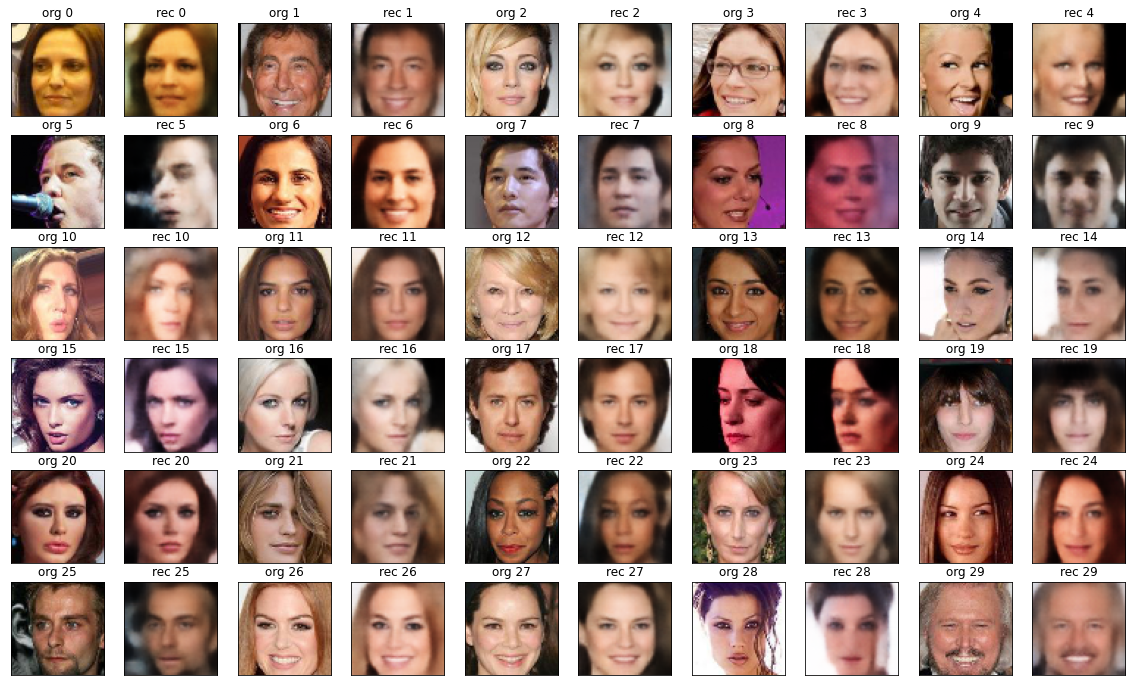

In [260]:
plot_recimg(vae, x_data, 6, save_dir+'/rec_result')

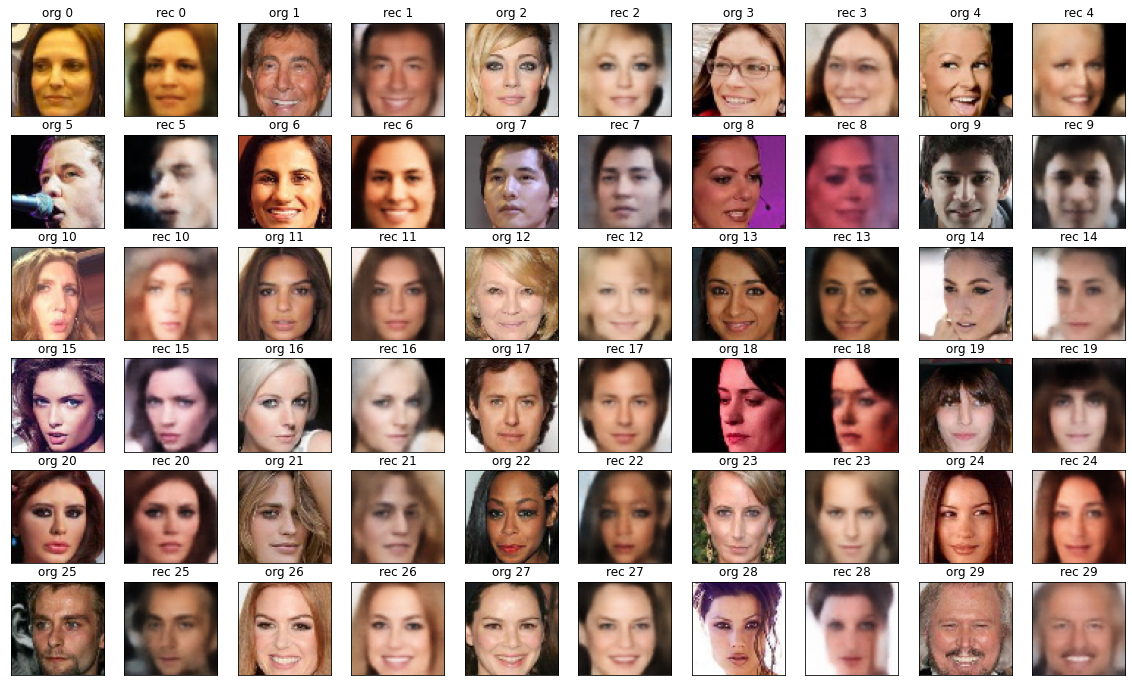

In [50]:
plot_recimg(vae, x_data, 6, save_dir+'/rec_result')

## 3-2. Plot z-space

* original z space:  -6.468441


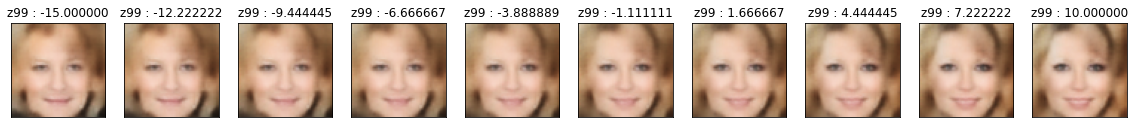

In [134]:
plot_gridimg(encoder, decoder, x_data, 12, 99 , -15, 10)

* original z space:  -0.57933104


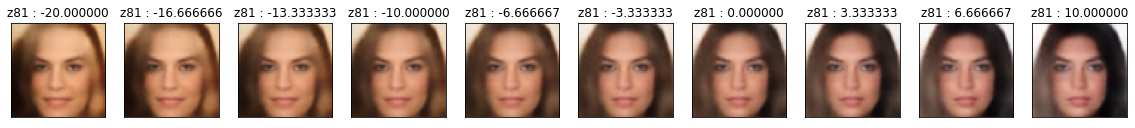

In [97]:
plot_gridimg(encoder, decoder, x_data, 11, 81, -20, 10)

* original z space:  -1.6970544


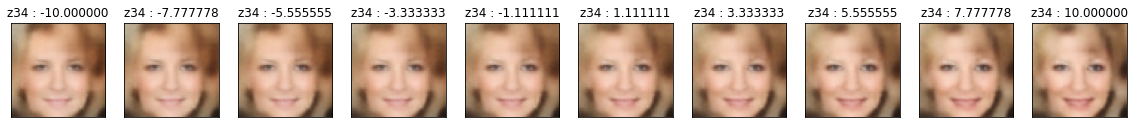

In [42]:
plot_gridimg(encoder, decoder, x_data, 12, 34, -10, 10)